In [1]:
# 10/16/2020
# This notebook demonstrates how to save run parameters and results from CFL

In [1]:
# imports
import sys
sys.path.insert(1, '../../../cfl')
from cfl.cfl_wrapper import make_CFL # include this in in
import numpy as np
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf

X shape: (13140, 495)
Y shape: (13140, 495)


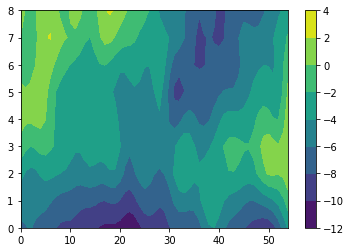

In [2]:
# load data
X, Y, coords = joblib.load('../../cfl_examples/el_nino/elnino_data.pkl')
imshape = (55, 9)
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

# plot an example image
plt.contourf(X[0].reshape(imshape).T)
plt.colorbar()
plt.show()

In [3]:
# set all CFL parameters

# generic data parameters
data_info = { 'X_dims' : X.shape, 
              'Y_dims' : Y.shape } 

# CDE parameters
lr = 1e-4
CDE_params = { 'batch_size'  : 32,
               'lr'          : lr, 
               'optimizer'   : 'adam',
               'n_epochs'    : 2,
               'verbose'     : True }

# clusterer parameters
cluster_params = { 'n_Xclusters' : 4, 
                   'n_Yclusters' : 4 }

# path setup: make a directory where you want to save your results and set path here
save_path = '../../results/el_nino'

In [5]:
# build CFL object! 
cfl_object = make_CFL(  data_info=data_info, 
                        CDE_type='CondExp', 
                        cluster_type='Kmeans', 
                        CDE_params=CDE_params, 
                        cluster_params=cluster_params, 
                        save_path=save_path)

All results from this run will be saved to ../../results/el_nino/run0013


In [ ]:
# # if you want to build the cfl_object manually instead of using make_CFL, here are the steps:
# # (replace CondExp and KMeans with your models of choice)

# # build CDE object
# CDE_object = CondExp(data_info, CDE_params)

# # build cluster object
# cluster_object = KMeans(cluster_params)

# # build saver
# saver = Saver(save_path)
# saver.set_save_mode('parameters')

# # save setup parameters using the save_params helper function
# saver.save_params(CDE_params, 'CDE_params')
# saver.save_params(cluster_params, 'cluster_params')

# # put this all together into a cfl object
# cfl_object = Two_Step_CFL_Core(CDE_object, cluster_object, saver)

In [7]:
train_results = cfl_object.train(X, Y, standardize=True)

In [ ]:
pyx = cfl_object.predict(X, Y, data_series='dataset0')